Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 249.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 228.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 113.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 231.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 257.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 238.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 250.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of requests[socks] to determine which version is compatible with 

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [5]:
# Load in the wine dataset
wine = datasets.load_wine()

In [6]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [7]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [9]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label="target").fit(train_data=df_train, time_limit=120, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240419_161025"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 120 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240419_161025/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 80 seconds 

In [10]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  NeuralNetFastAI_BAG_L1   0.985915    accuracy       0.130224  31.350609                0.130224          31.350609            1       True          3
1     WeightedEnsemble_L2   0.985915    accuracy       0.131306  31.409242                0.001082           0.058633            2       True          4
2     WeightedEnsemble_L3   0.985915    accuracy       0.133114  31.430602                0.002890           0.079993            3       True          6
3  NeuralNetFastAI_BAG_L2   0.964789    accuracy       0.322350  62.317091                0.135153          30.943207            2       True          5
4   KNeighborsDist_BAG_L1   0.711268    accuracy       0.033342   0.017633                0.033342           0.017633            1       True          2
5   KNeighborsUnif_B

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'WeightedEnsemble_L2': 0.9859154929577465,
  'NeuralNetFastAI_BAG_L2': 0.9647887323943662,
  'WeightedEnsemble_L3': 0.9859154929577465},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'NeuralNetFastAI_BAG_L1': ['NeuralNetFastAI_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'NeuralNetFastAI_BAG_L2': ['NeuralNetFastAI_BAG_L2'],
  'WeightedEn

<Axes: xlabel='model'>

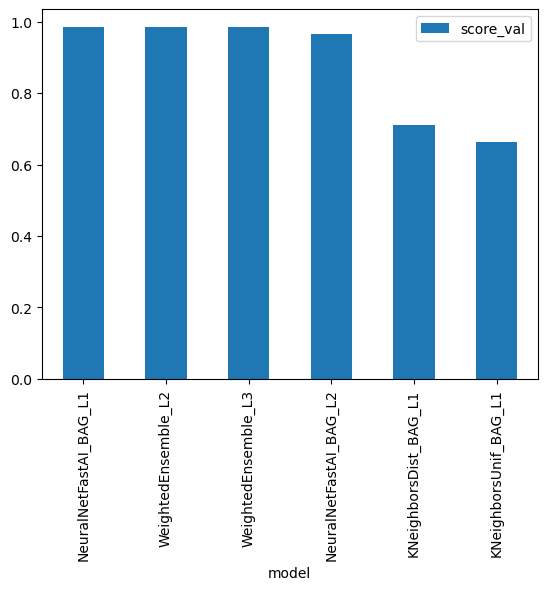

In [13]:
# Evaluate the models performance on the test dataset
predictor.evaluate(df_test)
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

## AutoGluon Regression

In [14]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [15]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [16]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [18]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label="target", problem_type="regression", eval_metric="r2").fit(train_data=dfd_train, time_limit=120, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240419_161428"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 120 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240419_161428/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 55 seconds 

In [19]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3   0.534052          r2       0.073255  60.601875                0.000972           0.072693            3       True          7
1    WeightedEnsemble_L2   0.532749          r2       0.047969  42.803629                0.000675           0.066891            2       True          5
2      LightGBMXT_BAG_L1   0.530845          r2       0.021395  21.569772                0.021395          21.569772            1       True          3
3      LightGBMXT_BAG_L2   0.517343          r2       0.072283  60.529182                0.010467          17.780433            2       True          6
4        LightGBM_BAG_L1   0.495653          r2       0.011398  21.160707                0.011398          21.160707            1       True          4
5  KNeighborsDist_BAG_L1  

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.4397005764934093,
  'LightGBMXT_BAG_L1': 0.5308451089941344,
  'LightGBM_BAG_L1': 0.4956533619566885,
  'WeightedEnsemble_L2': 0.5327486348846964,
  'LightGBMXT_BAG_L2': 0.5173425927913655,
  'WeightedEnsemble_L3': 0.5340516050468029},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsem

<Axes: xlabel='model'>

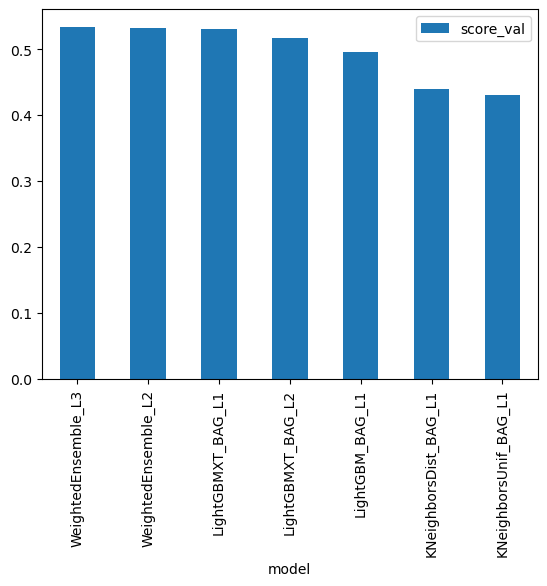

In [20]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")